In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [82]:
mat = loadmat("ex5data1.mat")

In [83]:
X=mat["X"]
y=mat["y"]
Xtest=mat["Xtest"]
ytest=mat["ytest"]
Xval=mat["Xval"]
yval=mat["yval"] 

Text(0, 0.5, 'Water flowing out of the dam')

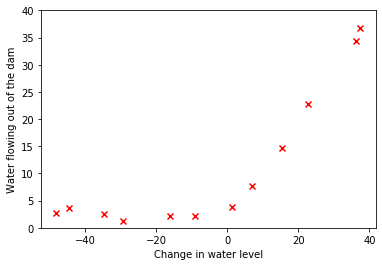

In [84]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylim(0,40)
plt.ylabel("Water flowing out of the dam")

$J(\Theta) = \frac{1}{2m} (\sum_{i=1}^m(h_\Theta(x^{(i)}) - y^{(i)})^2) + \frac{\lambda}{2m}(\sum_{j=1}^n \Theta_j^2)$

In [85]:
def computeCost(X, y, theta, lambd):
    m = len(y)
    y_hat = np.dot(X, theta)
    squared_error = (y_hat - y)**2
    cost = (1 / (2 * m)) * np.sum(squared_error)
    regCost = cost + (lambd / (2 * m)) * np.sum(theta[1:]**2)
    return regCost    

In [86]:
m = X.shape[0]
X = np.append(np.ones((m, 1)), X, axis=1)
n = X.shape[1]
theta = np.zeros((n, 1))

In [87]:
def gradientDescent(X, y, theta, lambd, learningRate, numberOfIterations):
    m = len(y)
    cost_history = []
    for i in range(numberOfIterations):
        y_hat = np.dot(X, theta)
        error = y_hat - y
        j_b = (1 / m) * np.dot(X.T, error)[0]
        j_w = (1 / m) * np.dot(X.T, error)[1:] + (lambd / 2) * theta[1:]
        gradient = np.vstack((j_b, j_w))
        theta -= gradient * learningRate
        cost_history.append(computeCost(X, y, theta, lambd))
    return theta, cost_history

In [88]:
theta, cost_history = gradientDescent(X, y, theta, 0, 0.001, 4000)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

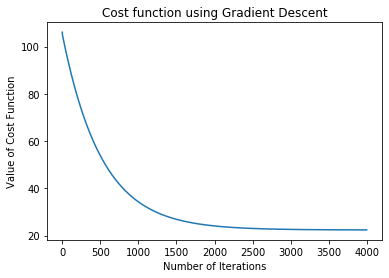

In [89]:
plt.plot(cost_history)
plt.xlabel("Number of Iterations")
plt.ylabel("Value of Cost Function")
plt.title("Cost function using Gradient Descent")

(-50, 40)

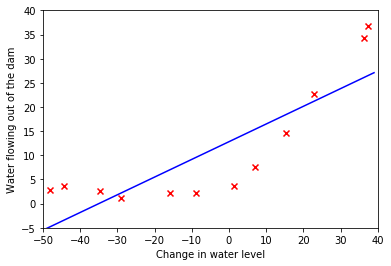

In [90]:
plt.scatter(X[:, 1],y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=[x for x in range(-50,40)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="b")
plt.ylim(-5,40)
plt.xlim(-50,40)

In [91]:
def learningCurve(X, y, X_val, y_val, lambd):
    m = len(y)
    n = X.shape[1]
    train_err, val_err = [],[]
    for i in range(1, m+1):
        theta = gradientDescent(X[0:i, :], y[0:i, :], np.zeros((n, 1)),lambd, 0.001, 3000)[0]
        train_err.append(computeCost(X[0:i,:], y[0:i,:], theta, lambd))
        val_err.append(computeCost(X_val, y_val, theta, lambd))
    return train_err, val_err

In [92]:
Xval = np.append(np.ones((Xval.shape[0], 1)), Xval, axis=1)
train_err, val_err = learningCurve(X, y, Xval, yval, 0)

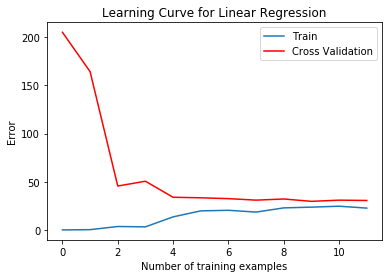

In [95]:
plt.plot(range(12),train_err,label="Train")
plt.plot(range(12),val_err,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()

In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [97]:
polynomialFeatures = PolynomialFeatures(8)
standardScaler = StandardScaler()

In [106]:
X_poly = polynomialFeatures.fit_transform(X[:,1:2])
X_poly = standardScaler.fit_transform(X_poly)

In [109]:
theta, cost_history = gradientDescent(X_poly, y, np.zeros((9, 1)), 0, 0.001, 4000)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

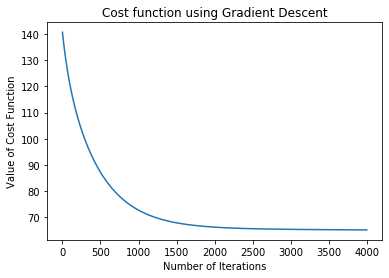

In [111]:
plt.plot(cost_history)
plt.xlabel("Number of Iterations")
plt.ylabel("Value of Cost Function")
plt.title("Cost function using Gradient Descent")

(-50, 40)

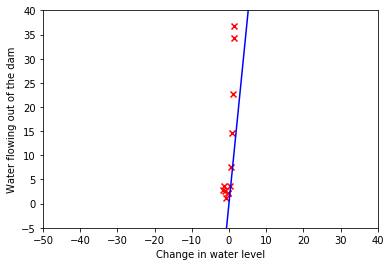